# 学习内容

- Pandas
- Stochastics and Monte Carlo （随机与蒙特卡罗）
- Statistical application （统计应用）
- Lab session （实验部分）

## Pandas 基础

In [44]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.arange(1,5),\
                 columns = ['number'],\
                 index = ['a','b','c','d'])
df

,number
a,1
b,2
c,3
d,4


In [45]:
df.index,df.columns

# .ix is deprecated. Please use
# .loc for label based indexing or .iloc for positional indexing
df.ix['a']
df.loc['c']

df

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,number
a,1
b,2
c,3
d,4


In [46]:
df['floats'] = [1.5, 2.5, 3.5, 4.5]

#add a new column called 'names' by index
df['names'] = pd.DataFrame(['Dan','Cox','Ale','Bob'],
                           index = ['d','c','a','b'])
#add a new object to df
df = df.append(pd.DataFrame({\
               'number':66, 'floats':5.5,\
               'names':'Yor'}, index=['y',]))
df

,number,floats,names
a,1,1.5,Ale
b,2,2.5,Bob
c,3,3.5,Cox
d,4,4.5,Dan
y,66,5.5,Yor


## 处理缺失的数据

In [55]:
#我们通过"join"函数添加一个名为\squares的新列。
# df = df.join(pd.DataFrame([1,4,9,16,25],\
#                index=['a','b','c','d','x'], \
#                columns=['squares',]),how='outer')  #<--squares
df

,number,floats,names,squares
a,1.0,1.5,Ale,1.0
b,2.0,2.5,Bob,4.0
c,3.0,3.5,Cox,9.0
d,4.0,4.5,Dan,16.0
x,NaN,NaN,NaN,25.0
y,66.0,5.5,Yor,NaN


## 处理金融数据
- Pandas内置函数DataReader从以下网站检索数据：
- Yahoo! Finance (Yahoo)
- Google Finance (Google)
- St. Louis FED (Fred)
-  Kenneth French’s data library (Famafrench)
- World Band (via pandas.io.wb)

In [97]:
import pandas_datareader.data as web
#pandas.io.data已经用不成了，得替换为pandas_datareader
# FT = web.DataReader(name = '^FTSE', \
# data_source = 'yahoo',\
# start = '2019-1-1')
# print(FT.info()) # show information
# print(FT.tail()) # show last 5 rows`
# # plot the FTSE 100 graph`
# FT['Close'].plot(figsize = (8, 6), \
# grid = True)

import datetime
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2015,8,22)
 
df2 = web.DataReader('F-F_Research_Data_factors','famafrench',start,end)
type(df2[1])
df2[1]

,Mkt-RF,SMB,HML,RF
Date,,,,
2010,17.37,13.80,-5.30,0.12
2011,0.44,-6.01,-8.45,0.04
2012,16.28,-1.15,9.73,0.06
2013,35.20,7.27,1.50,0.02
2014,11.70,-8.08,-1.64,0.02
2015,0.07,-4.05,-9.61,0.02


## 产生随机数

([<matplotlib.lines.Line2D at 0x1fe96648588>],
 [<matplotlib.lines.Line2D at 0x1fe96648e10>])

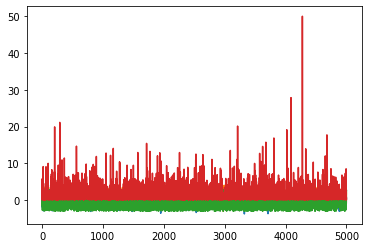

In [110]:
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy as np

X = npr.standard_normal((5000))
Y = npr.normal(1, 1, (5000))
Z = npr.uniform(-3, 3, (5000))
W = npr.lognormal(0, 1, (5000))

plt.plot(X),plt.plot(Y),plt.plot(Z),plt.plot(W)